<a href="https://colab.research.google.com/github/goswamimohit/2018-02-olympic-figure-skating-analysis/blob/master/Bank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [2]:
from chart_studio import plotly

In [3]:
import plotly.express as px
 

In [4]:
import plotly as py
import plotly.graph_objs as go

In [5]:
train=pd.read_csv('/content/train.csv',sep=';')
test=pd.read_csv('/content/test.csv',sep=';')
bank=pd.concat([train,test],ignore_index=True)

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
for col in bank.columns:

  print('Number of Unique Values in',col.title() ,('-'),(bank[col].nunique()))

Number of Unique Values in Age - 77
Number of Unique Values in Job - 12
Number of Unique Values in Marital - 3
Number of Unique Values in Education - 4
Number of Unique Values in Default - 2
Number of Unique Values in Balance - 7168
Number of Unique Values in Housing - 2
Number of Unique Values in Loan - 2
Number of Unique Values in Contact - 3
Number of Unique Values in Day - 31
Number of Unique Values in Month - 12
Number of Unique Values in Duration - 1573
Number of Unique Values in Campaign - 48
Number of Unique Values in Pdays - 559
Number of Unique Values in Previous - 41
Number of Unique Values in Poutcome - 4
Number of Unique Values in Y - 2


### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

In [193]:
bank_previous=bank.loc[bank['poutcome'] != 'unknown']

In [194]:
for col in bank_previous.columns:

  print('Number of Unique Values in',col.title() ,('-'),(bank_previous[col].nunique()))

Number of Unique Values in Age - 72
Number of Unique Values in Job - 12
Number of Unique Values in Marital - 3
Number of Unique Values in Education - 4
Number of Unique Values in Default - 2
Number of Unique Values in Balance - 3175
Number of Unique Values in Housing - 2
Number of Unique Values in Loan - 2
Number of Unique Values in Contact - 3
Number of Unique Values in Day - 31
Number of Unique Values in Month - 12
Number of Unique Values in Duration - 985
Number of Unique Values in Campaign - 16
Number of Unique Values in Pdays - 556
Number of Unique Values in Previous - 40
Number of Unique Values in Poutcome - 3
Number of Unique Values in Y - 2
Number of Unique Values in Age_Group - 4
Number of Unique Values in New_Bal - 2792


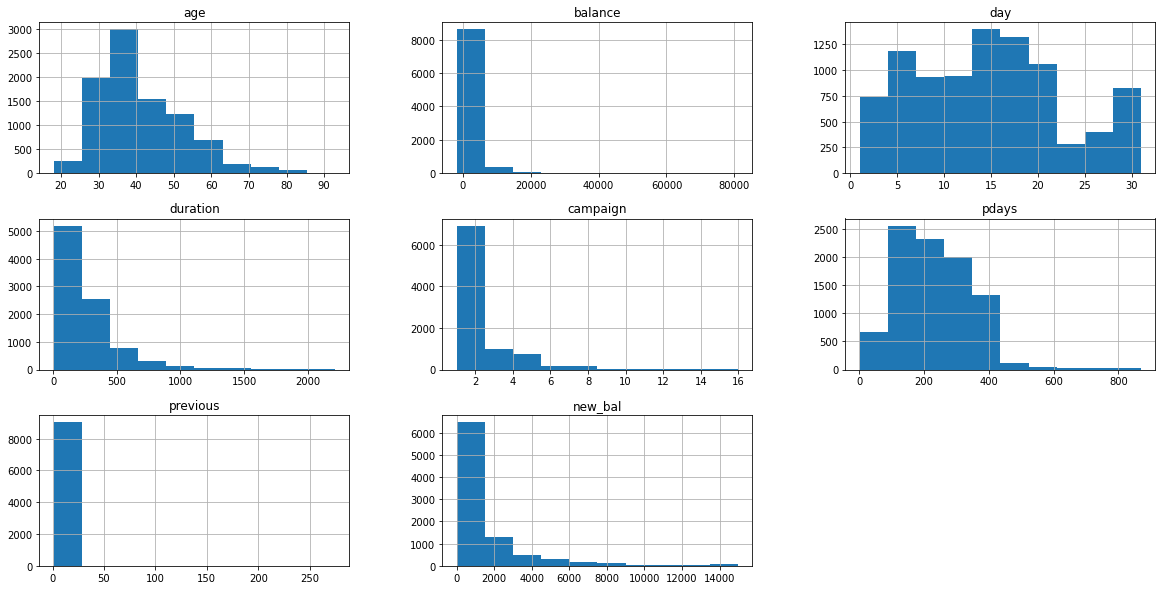

In [197]:
bank_previous.hist(figsize=(20, 10));

In [189]:
(bank.poutcome=='unknown').sum()/len(bank)*100

81.76626719214993

In [188]:
(bank.pdays==-1).sum()/len(bank)*100#checking 999 if present client not previously contacted

81.75621330330571

customer not previousaly contacted near to 82%  clearly show to us that 82% customers are new.

failure    0.594508
other      0.224636
success    0.180856
Name: poutcome, dtype: float64


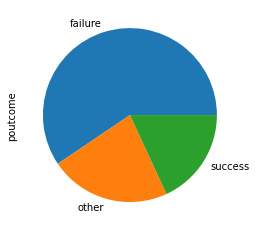

In [201]:
proprtion_of_positive_outcome_in_total_obervation_new = bank_previous.poutcome.value_counts()/len(bank_previous)
print(proprtion_of_positive_outcome_in_total_obervation_new)
proprtion_of_positive_outcome_in_total_obervation_new.plot(kind='pie');

no     0.883174
yes    0.116826
Name: y, dtype: float64


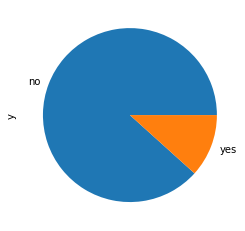

In [203]:
proprtion_of_positive_outcome_in_total_obervation = bank.y.value_counts()/len(bank)
print(proprtion_of_positive_outcome_in_total_obervation)
proprtion_of_positive_outcome_in_total_obervation.plot(kind='pie');

In [11]:
fig = px.pie(proprtion_of_positive_outcome_in_total_obervation, values=proprtion_of_positive_outcome_in_total_obervation,
             names=["yes",'No'],title='Proprtion of Positive Outcome In Total Obervation',hover_data=['y'],
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(autosize=True,width=500,height=400,margin=dict(l=50,r=50,b=100,t=100,pad=4),paper_bgcolor="LightSteelBlue")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# The socio-economic variables are a statistical indicator of the customer themselves based on various other factors, so it has a lot of information in it which should be used for analysis.

# Socio Economic Profile

- job
- education
- marriage
- defaulted
- age

In [12]:
bins = [0, 25, 40, 60, 100]
labels = ['18-25','26-40','41-60','60>']
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels)


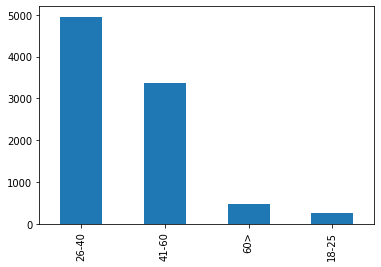

In [204]:
bank_previous.age_group.value_counts().plot(kind='bar')

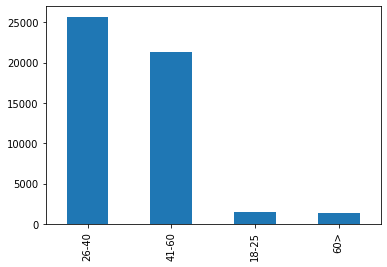

In [13]:
bank.age_group.value_counts().plot(kind='bar')

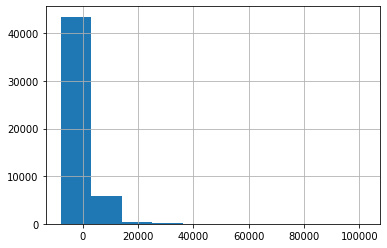

In [14]:
bank.balance.hist()

In [15]:
bank['new_bal']=bank['balance'].copy(deep=True)

In [16]:
bank.loc[bank['new_bal'] > 15000, 'new_bal'] = 15000
bank.loc[bank['new_bal'] < 0, 'new_bal'] = 0

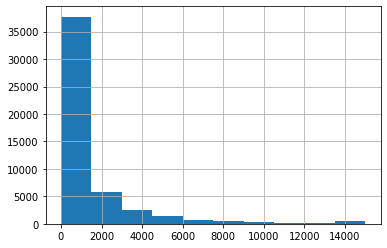

In [17]:
bank['new_bal'].hist()

In [18]:
job_y = bank.groupby(by=["job", "y"]).size().reset_index(name="counts")

In [211]:
job_y

,job,y,counts
0,admin.,no,4960
1,admin.,yes,689
2,blue-collar,no,9901
3,blue-collar,yes,777
4,entrepreneur,no,1517
5,entrepreneur,yes,138
6,housemaid,no,1229
7,housemaid,yes,123
8,management,no,8995
9,management,yes,1432


In [210]:
job_y_p

,job,poutcome,counts
0,admin.,failure,702
1,admin.,other,267
2,admin.,success,227
3,blue-collar,failure,1169
4,blue-collar,other,438
5,blue-collar,success,162
6,entrepreneur,failure,179
7,entrepreneur,other,46
8,entrepreneur,success,23
9,housemaid,failure,107


In [214]:
job_y_p = bank_previous.groupby(by=["job", "poutcome"]).size().reset_index(name="counts")
fig = px.bar(job_y_p, x="job", y="counts", color='poutcome',text="job",title="Type of Job and Subsrcitption of Term deposit ", barmode="group", pattern_shape="poutcome", pattern_shape_sequence=[".", "x"], text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

In [19]:
fig = px.bar(job_y, x="job", y="counts", color='y',text="job",title="Type of Job and Subsrcitption of Term deposit ", barmode="group", pattern_shape="y", pattern_shape_sequence=[".", "x"], text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

In [20]:
age_y = bank.groupby(by=["age_group", "y"]).size().reset_index(name="counts")

fig = px.bar(age_y, x="age_group", y="counts", color='y',text="age_group",title="Age Group and Subsrcitption of Term deposit ", barmode="group", pattern_shape="y", pattern_shape_sequence=[".", "x"], text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

In [21]:
education_y = bank.groupby(by=["education", "y"]).size().reset_index(name="counts")

fig = px.bar(education_y, x="education", y="counts", color='y',text="education",title="Education and Subsrcitption of Term deposit ", barmode="group", text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

In [22]:
marriage_y = bank.groupby(by=["marital", "y"]).size().reset_index(name="counts")

fig = px.bar(marriage_y, x="marital", y="counts", color='y',text="marital",
             color_discrete_sequence=px.colors.sequential.solar,title="Marital Status and Subsrcitption of Term deposit ", barmode="group", text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

In [23]:
default_y = bank.groupby(by=["default", "y"]).size().reset_index(name="counts")

fig = px.bar(default_y, x="default", y="counts", color='y',color_continuous_scale=px.colors.sequential.Cividis_r,text="default",title="Default Status and Subsrcitption of Term deposit ", barmode="group", text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

In [26]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_group', 'new_bal'],
      dtype='object')

In [58]:
job=bank.job.value_counts()
job_label=job.index.tolist()

In [64]:
marital=bank.marital.value_counts()
marital_label=marital.index.tolist()

In [65]:
default=bank.default.value_counts()
default_label=default.index.tolist()

In [60]:
education=bank.education.value_counts()
education_label=education.index.tolist()

In [122]:
housing=bank.housing.value_counts()
housing_label=housing.index.tolist()

In [123]:
loan=bank.loan.value_counts()
loan_label=loan.index.tolist()

In [128]:
day=bank.day.value_counts()
day_label=day.index.tolist()

In [129]:
month=bank.month.value_counts()
month_label=month.index.tolist()

In [134]:
contact=bank.contact.value_counts()
contact_label=contact.index.tolist()

In [135]:
poutcome=bank.poutcome.value_counts()
poutcome_label=poutcome.index.tolist()

In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=job,labels=job_label, name="Distribution of Jobs"),
              1, 1)
fig.add_trace(go.Pie(values=education,labels=education_label, name="Distribution of education"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
           title={
        'text': "Distribution of categorical varriable",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Job', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Education', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [115]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=marital,labels=marital_label,),
              1, 1)
fig.add_trace(go.Pie(values=default,labels=default_label, marker_colors=['rgb(146, 123, 21)', 'rgb(151, 179, 100)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
        title={
        'text': "Distribution of categorical varriable",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Marital Status', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Default', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [127]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=housing,labels=housing_label,),
              1, 1)
fig.add_trace(go.Pie(values=loan,labels=loan_label,),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
        title={
        'text': "Distribution of categorical varriable",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Housing Loan', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Personal Loan', x=0.86, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [133]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=day,labels=day_label,),
              1, 1)
fig.add_trace(go.Pie(values=month,labels=month_label,),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
        title={
        'text': "Distribution of categorical varriable",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Day', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Months', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [143]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=contact,labels=contact_label,),
              1, 1)
fig.add_trace(go.Pie(values=poutcome,labels=poutcome_label,),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
        title={
        'text': "Distribution of categorical varriable",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Contact', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Previous Outcome', x=0.86, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [144]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_group', 'new_bal'],
      dtype='object')

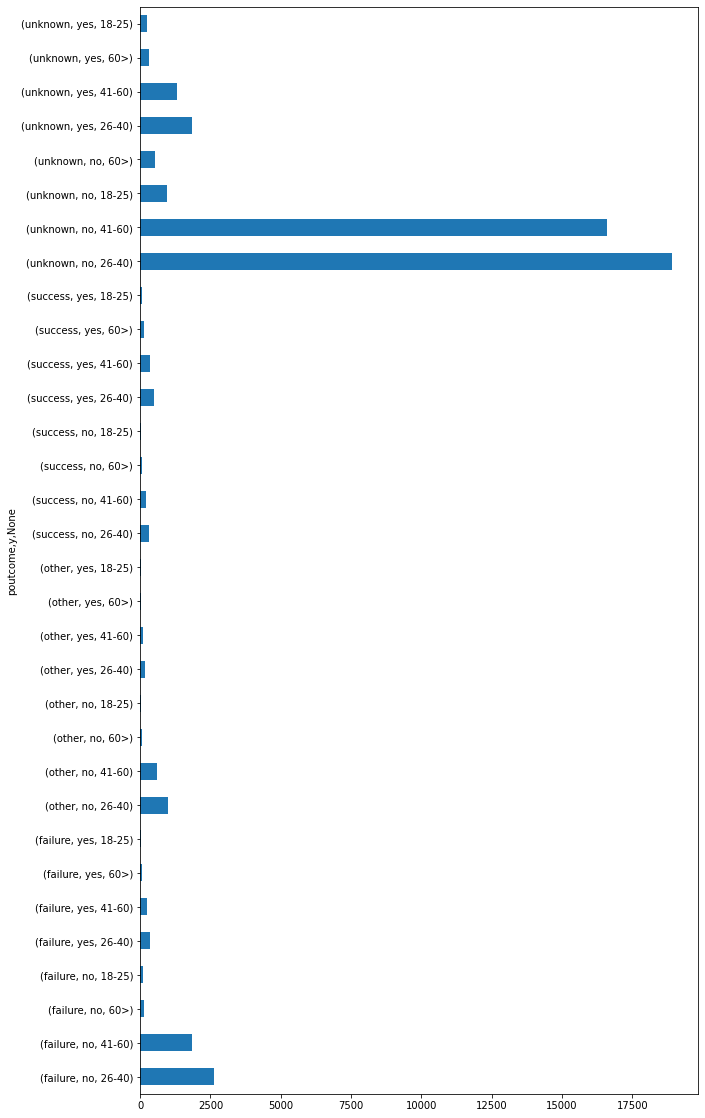

In [174]:
bank.groupby(['poutcome', 'y'])['age_group'].value_counts().plot(figsize=(10, 20),kind='barh')

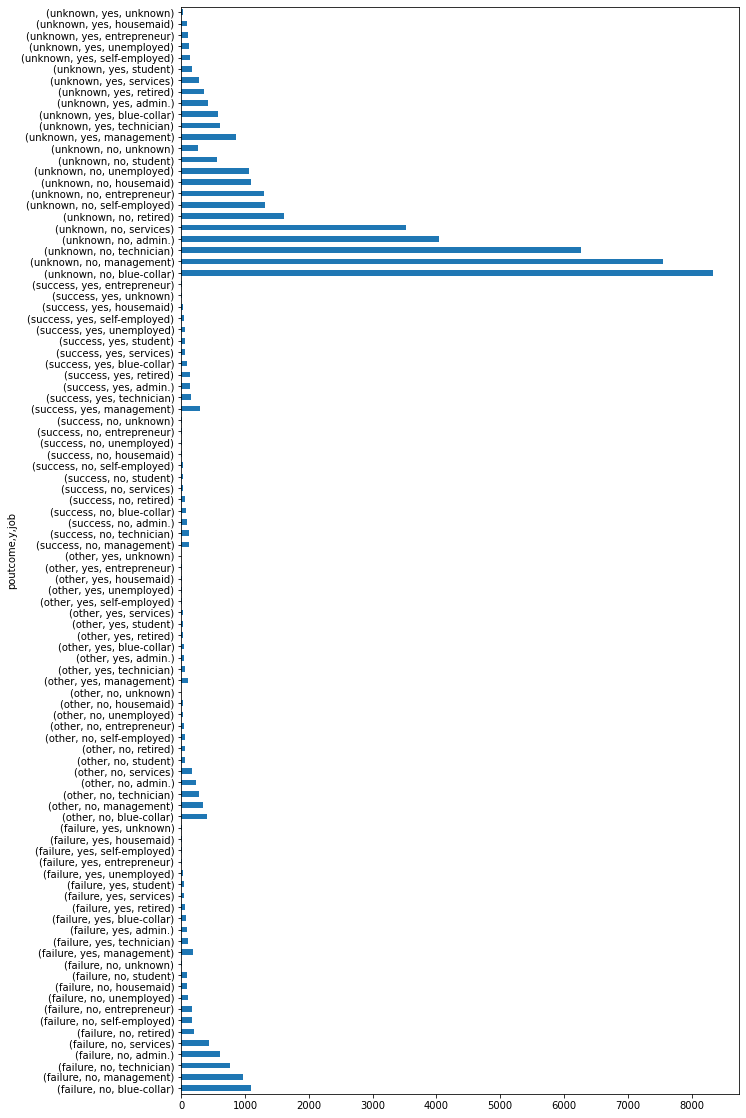

In [175]:
bank.groupby(['poutcome', 'y'])['job'].value_counts().plot(figsize=(10, 20),kind='barh')

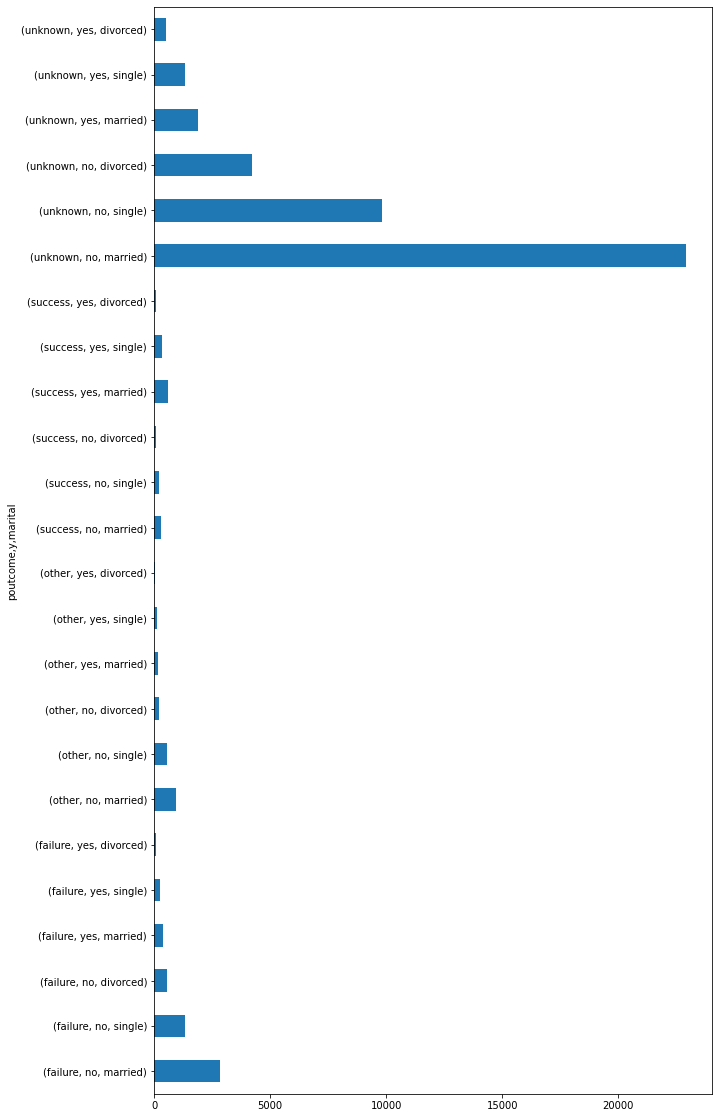

In [179]:
bank.groupby(['poutcome', 'y'])['marital'].value_counts().plot(figsize=(10, 20),kind='barh')

In [182]:
bank.groupby(['job'])['poutcome', 'y'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,poutcome,y
job,,
admin.,unknown,yes
blue-collar,unknown,yes
entrepreneur,unknown,yes
housemaid,unknown,yes
management,unknown,yes
retired,unknown,yes
self-employed,unknown,yes
services,unknown,yes
student,unknown,yes
